In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
### Cambiamos al directorio del drive y le damos autorizacion

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
### Renombramos My Drive a mydrive para evitar problemas con el espacio " "

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20180914_Waiver_Juan_Pablo.pdf
'2020_Book_MachineLearningForMedicalImage (1).pdf'
 2-Aurélien-Géron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O’Reilly-Media-2019.pdf
 2dtodepth
'Arc Welding Reliability Model-rev1-presentacion jueves-Mark up-rev2.pptx'
 Auto_econder.ipynb
 bin
 Bombas.rar
 catboost_info
 CCWJ
 CCWJ_Meeting_Minutes_499.gdoc
 CCWJ_Meeting_Minutes_499.pdf
 Data_navy
 Example
 Form100_AppendixD_Juan_Pablo.pdf
 Foto_swiss_contact.jpg
 logs.log
 Medical_care
 Memoria_CCWJ_jprc_rev00000.pdf
 Memoria_CCWJ_jprc_rev0.pdf
 Memoria_CCWJ_rev3.pdf
 Memoria_CCWJ_rev4.pdf
 Memoria_CCWJ_rev5.pdf
'My Drive'
 Pycaret
 Pytorch
'Returning_to_Campus_-_Record_of_Completion (3).pdf'
 Returning_to_Campus_-_Record_of_Completion.pdf
 sample_img
 saved_model.pkl
'Surface topography semantic segmentation'
 visitor-waiver-form.gdoc
 visitor-waiver-

In [4]:
%cd mydrive/Data_navy

/content/gdrive/My Drive/Data_navy


In [5]:
df = pd.read_csv('file_name.csv')

In [6]:
df.fillna(0, inplace=True)
df.isna().sum()
power = df['Mean_global_active_power'].values.astype('float32')

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-2*look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back: i+2*look_back])
	return np.array(dataX), np.array(dataY)

In [8]:
X, Y = create_dataset(power, look_back=365)

In [9]:
X.shape

(711, 365)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
Y = scaler.transform(Y)

In [11]:
X = X.reshape(711, 365, 1)

In [12]:
Y = Y.reshape(711, 365, 1)

In [13]:
# Se separan los datos de entrenamiento, validacion y testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=False)

In [14]:
x_train.shape

(476, 365, 1)

In [15]:
# Se separan los datos de entrenamiento, validacion y testeo
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, shuffle=False)

In [16]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#x_train = scaler.fit_transform(x_train).reshape(-1,1)
#y_train = scaler.transform(y_train).reshape(-1,1)

#x_val = scaler.transform(x_val).reshape(-1,1)
#y_val = scaler.transform(y_val).reshape(-1,1)
#x_test = scaler.transform(x_test).reshape(-1,1)
#y_test = scaler.transform(y_test).reshape(-1,1)


In [17]:
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time
# metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [18]:
x_train.shape[1:]

(365, 1)

In [19]:
x_train.shape

(357, 365, 1)

In [20]:

##Modelo Simple LSTM
model = tf.keras.Sequential()
model.add(layers.LSTM(128, activation='relu', input_shape =x_train.shape[1:], return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64,  activation='relu'))
model.add(layers.Dropout(0.5))
### NN densa
model.add(layers.Flatten())
model.add(layers.Dense(128, input_shape=(8,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))


model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
            loss='mean_squared_error',
            metrics=['mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 365, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 batch_normalization (BatchN  (None, 128)              5

In [21]:
# fit model
start_time = time.time()
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=300, batch_size = 512,  verbose=1).history
loss = history['loss']
val_loss = history['val_loss']
print('Final training time [min]: {:.2f}'.format((time.time()-start_time)/60))

Epoch 1/300
1/1 [==============================] - 10s 10s/step - loss: 1.5390 - mean_squared_error: 1.5390 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0.7797 - mean_squared_error: 0.7797 - val_loss: 0.1979 - val_mean_squared_error: 0.1979
Epoch 3/300
1/1 [==============================] - 1s 1s/step - loss: 0.6032 - mean_squared_error: 0.6032 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 4/300
1/1 [==============================] - 1s 1s/step - loss: 0.4302 - mean_squared_error: 0.4302 - val_loss: 0.1921 - val_mean_squared_error: 0.1921
Epoch 5/300
1/1 [==============================] - 1s 1s/step - loss: 0.3598 - mean_squared_error: 0.3598 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 6/300
1/1 [==============================] - 1s 1s/step - loss: 0.2746 - mean_squared_error: 0.2746 - val_loss: 0.1847 - val_mean_squared_error: 0.1847
Epoch 7/300
1/1 [==============================] -

In [22]:
X[-1].shape

(365, 1)

In [23]:
Y_2011 = model.predict([X[-1]])

12/12 [==============================] - 0s 2ms/step


In [24]:
Y_2011

array([[0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.38432288],
       [0.384

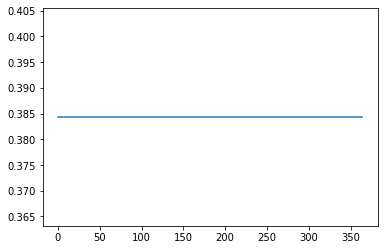

In [26]:
plt.plot(Y_2011)